In [5]:
import pandas as pd
from scipy.io import arff
data = arff.loadarff("phpMawTba.arff")
adult_census = pd.DataFrame(data[0])
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States',b'<=50K'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States',b'>50K'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States',b'<=50K'


In [6]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  class           48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [8]:
target_column = "class"
adult_census[target_column].value_counts()

class
b'<=50K'    37155
b'>50K'     11687
Name: count, dtype: int64

In [9]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [10]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


In [11]:
print(f"The dataset contains {adult_census.shape[1] -1} features")

The dataset contains 13 features


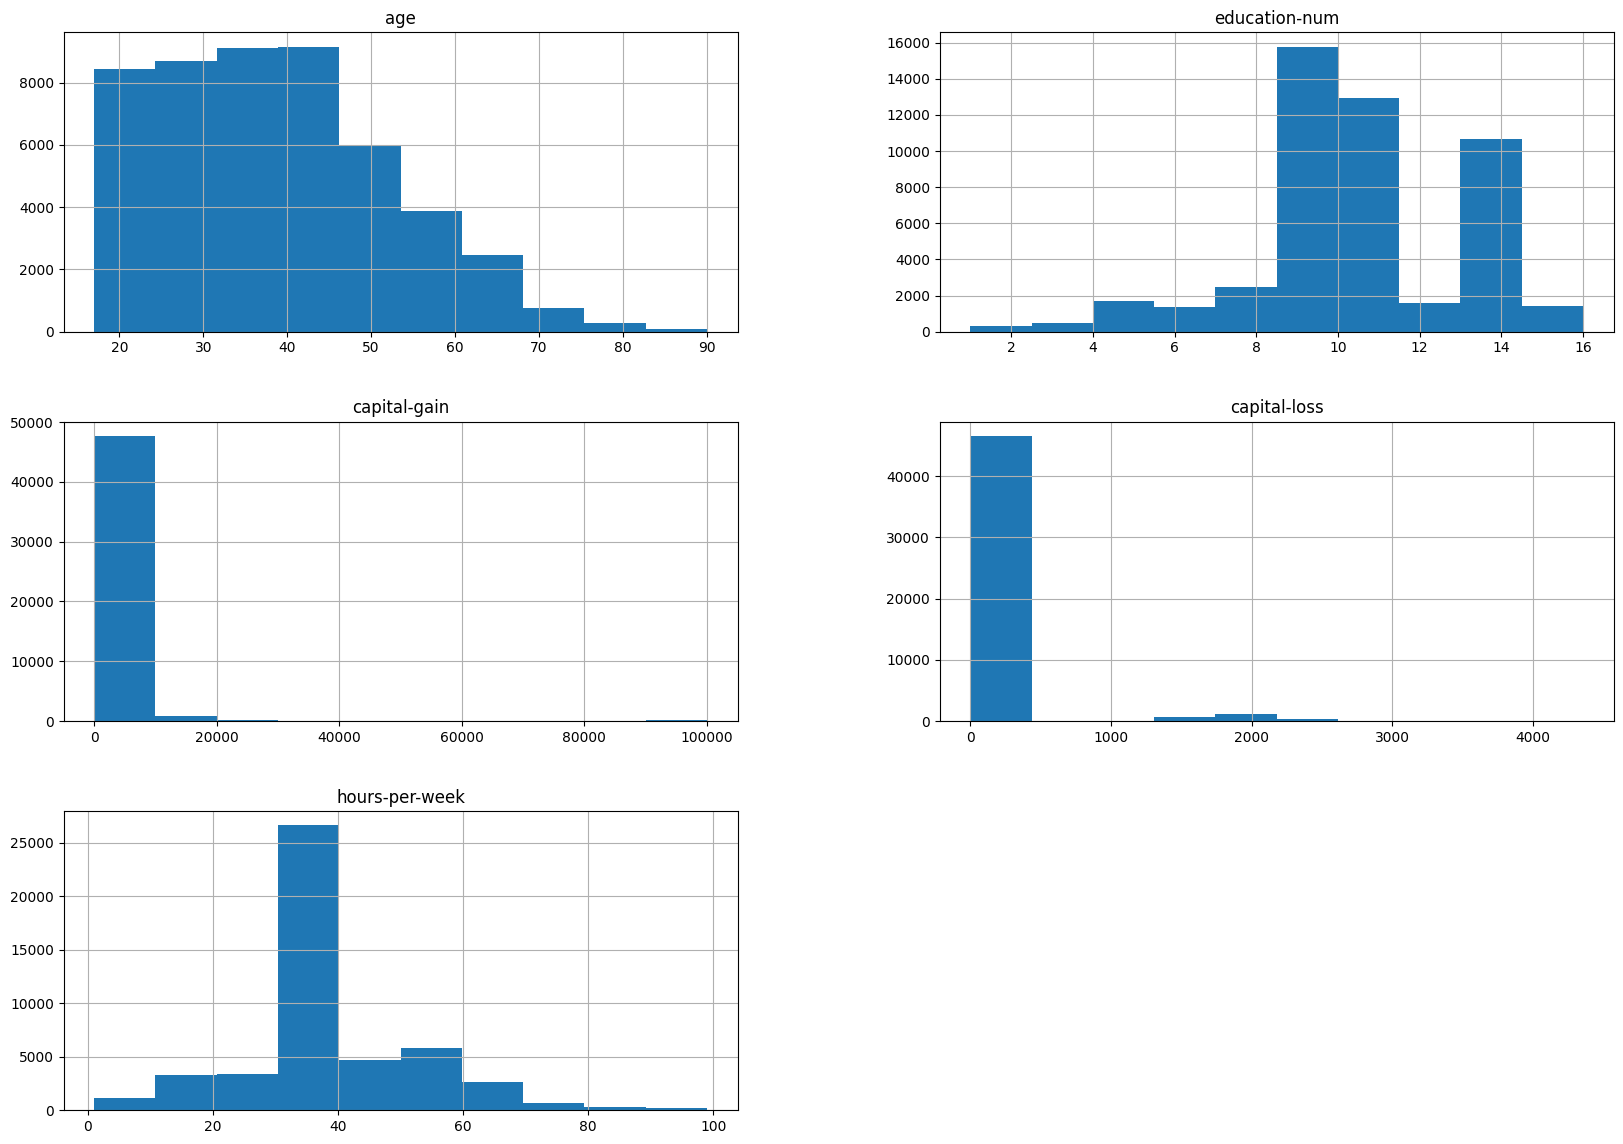

In [12]:
_ = adult_census.hist(figsize=(20, 14))

In [13]:
adult_census["sex"].value_counts()

sex
b'Male'      32650
b'Female'    16192
Name: count, dtype: int64

In [14]:
adult_census["education"].value_counts()

education
b'HS-grad'         15784
b'Some-college'    10878
b'Bachelors'        8025
b'Masters'          2657
b'Assoc-voc'        2061
b'11th'             1812
b'Assoc-acdm'       1601
b'10th'             1389
b'7th-8th'           955
b'Prof-school'       834
b'9th'               756
b'12th'              657
b'Doctorate'         594
b'5th-6th'           509
b'1st-4th'           247
b'Preschool'          83
Name: count, dtype: int64

In [15]:
pd.crosstab(
    index=adult_census["education"], columns = adult_census["education-num"]
)

education-num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
education,,,,,,,,,,,,,,,,
b'10th',0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
b'11th',0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
b'12th',0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
b'1st-4th',0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b'5th-6th',0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
b'7th-8th',0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
b'9th',0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
b'Assoc-acdm',0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
b'Assoc-voc',0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


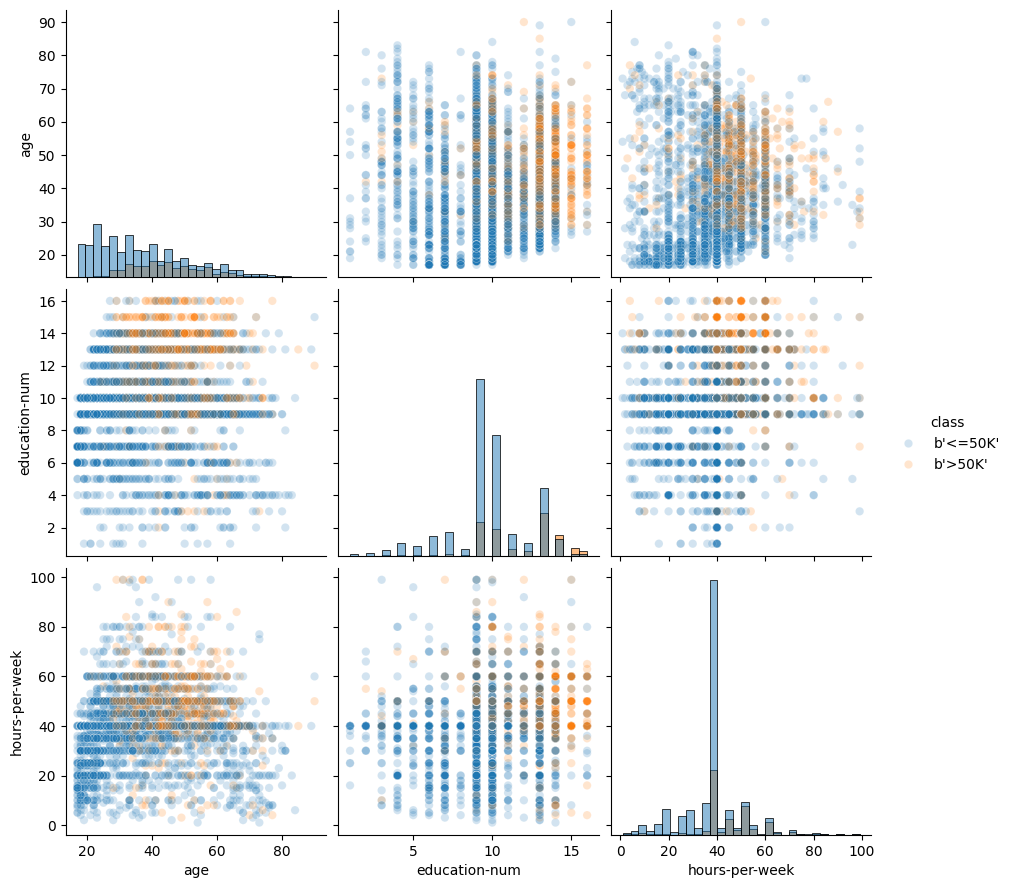

In [17]:
import seaborn as sns#builtonmatplotlib

n_samples_to_plot = 5000
coluumns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(data=adult_census[:n_samples_to_plot],
                 vars=coluumns,
                 hue=target_column,
                 plot_kws={"alpha":0.2},
                 height=3,diag_kind="hist",
                 diag_kws={"bins":30},)


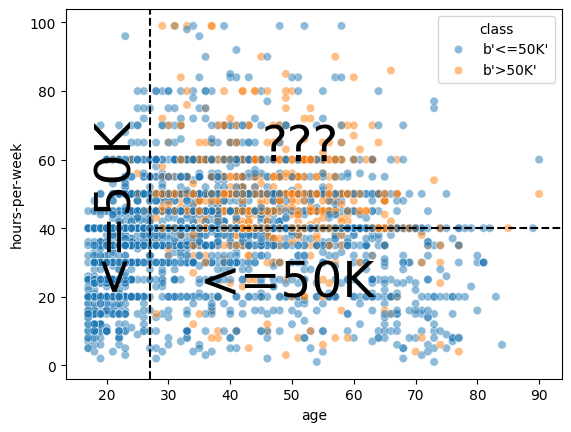

In [19]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5
)

age_limit =27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle ="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)